# Exercise 1 
## Loading and plotting the UCI wine dataset

### Goals

* Introduction to Google Colab
* Loading data into Pandas
* Indexing Pandas DataFrames
* Creating scatter plots using matplotlib




#### Imports
(Almost) everything in Python is imported. These lines load modules from four libraries:
* `numpy` - *the* library for numerical computing in Python
* `pandas` - a library for organizing and manipulating data
* `matplotlib` - a library for plotting
* `sklearn` - short for scikit-learn, a machine learning toolkit in Python

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

#font = {'size'   : 12}
#mpl.rc('font', **font)


from sklearn import datasets

### Loading [the UCI wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

In [2]:
# When you load data from sklearn, it is packaged into a Bunch (like a dict).
wine = datasets.load_wine()

#### Extract information to put in DataFrame

In [3]:
# Access the numerical data from the wine Bunch
data = wine['data']

data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
# Load data about the rows and columns
feature_names = wine['feature_names']

# Load cultivar information about each wine
class_names = ['Cultivar{}'.format(cl) for cl in wine['target']]

# Create nice names for each row
wine_names = ['Wine{}'.format(i) for i in range(data.shape[0])]

#### Create DataFrame

In [5]:
# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
Wine1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
Wine2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
Wine3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
Wine4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Calculating pairwise distances

In [7]:
from scipy.spatial.distance import pdist, squareform

In [8]:
D = squareform(pdist(data))

In [10]:
import seaborn as sns

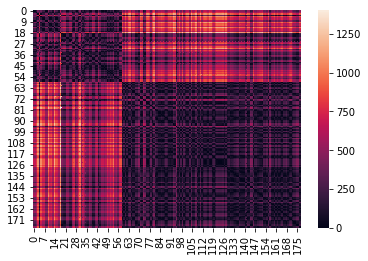

In [12]:
sns.clustermap(D, )

NameError: name 'scprep' is not defined

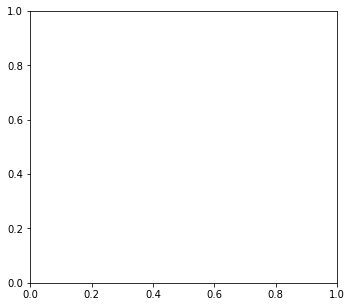

In [6]:
fig, ax = plt.subplots(1, figsize=(5.5,5))
scprep.plot.scatter(data_small.iloc[:,0], data_small.iloc[:,1], 
                    c=np.arange(10),
                    xlabel='Alcohol', ylabel='Hue', title='Hue and % Alcohol of 10 wines',
                    legend_anchor=(1,1), legend_title='Wine',
                    ax=ax)

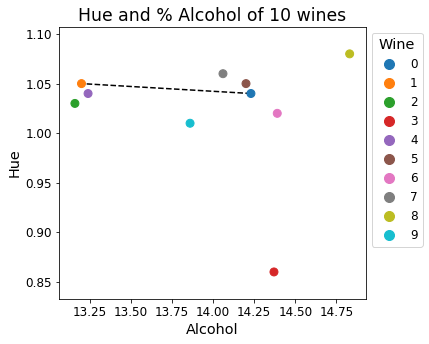

In [96]:
fig, ax = plt.subplots(1, figsize=(5.5,5))
scprep.plot.scatter(data_small.iloc[:,0], data_small.iloc[:,1], 
                    c=np.arange(10),
                    xlabel='Alcohol', ylabel='Hue', title='Hue and % Alcohol of 10 wines',
                    legend_anchor=(1,1), legend_title='Wine',
                    ax=ax)

ax.plot(data_small.iloc[0:2,0], data_small.iloc[0:2,1], c='k', linestyle='--', zorder=0)

In [99]:
from scipy.spatial.distance import pdist

In [106]:
np.sqrt(((data_small.iloc[0,:] - data_small.iloc[1,:]) ** 2).sum())

1.0300485425454484

#### Definition of Euclidean distance

$$ ||X_{0,:} - X_{1,:} ||^2_2 = \sqrt{(X_{0,0} - X_{1,0})^2 + (X_{0,1} - X_{1,1})^2} $$



$$ ||\textrm{Wine0} - \textrm{Wine1} ||^2_2 = \sqrt{(14.23 - 13.20)^2 + (1.04 - 1.05)^2} \approx 1.03$$


Text(13.5, 1.055, '1.03')

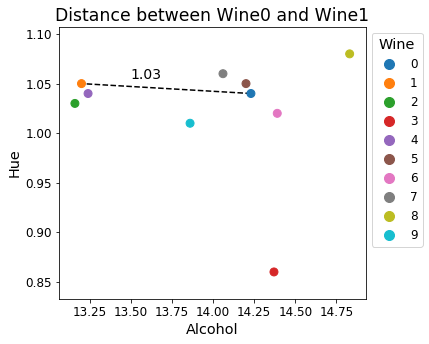

In [109]:
fig, ax = plt.subplots(1, figsize=(5.5,5))
scprep.plot.scatter(data_small.iloc[:,0], data_small.iloc[:,1], 
                    c=np.arange(10),
                    xlabel='Alcohol', ylabel='Hue', title='Distance between Wine0 and Wine1',
                    legend_anchor=(1,1), legend_title='Wine',
                    ax=ax)

ax.plot(data_small.iloc[0:2,0], data_small.iloc[0:2,1], c='k', linestyle='--', zorder=0)
ax.text(13.5, 1.055, 1.03, fontsize=14)

In [113]:
sns.husl_palette(data.shape[0])

[[0.9677975592919913, 0.44127456009157356, 0.5358103155058701],
 [0.968075479802471, 0.4433379070907767, 0.5175962852800732],
 [0.9683559078661849, 0.4454086068325291, 0.49834893740590364],
 [0.9686395835194151, 0.4474919540602786, 0.47786666143599893],
 [0.9689272803804369, 0.44959337305995756, 0.4558931710338268],
 [0.9692198144448897, 0.4517184755865254, 0.4320933427391824],
 [0.9695180538517513, 0.4538731229971183, 0.4060135300199891],
 [0.9698229298793882, 0.45606349410492936, 0.37701203643287656],
 [0.9701354494824507, 0.4582961604983891, 0.3441266184952567],
 [0.9704567097471909, 0.46057817138061324, 0.3057911286894212],
 [0.9707879147298125, 0.46291715039468656, 0.2591172293712652],
 [0.971130395255864, 0.46532140743922173, 0.19747293496853663],
 [0.9517657929985092, 0.4797783177013442, 0.19636561798415114],
 [0.9336412953379405, 0.4924721617087184, 0.1961804717672792],
 [0.9167935038764591, 0.5036372479480234, 0.19601241027117516],
 [0.9010437138603448, 0.5135664345255085, 0.1

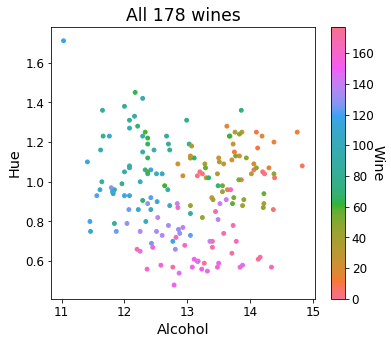

In [119]:
fig, ax = plt.subplots(1, figsize=(5.9,5))
scprep.plot.scatter(data_2d.iloc[:,0], data_2d.iloc[:,1], 
                    c=np.arange(data.shape[0]), cmap=sns.husl_palette(data.shape[0]),
                    xlabel='Alcohol', ylabel='Hue', title='All 178 wines',
                    legend_anchor=(1,1), legend_title='Wine',
                    ax=ax)

In [124]:
class_names = ['Cultivar{}'.format(i) for i in class_labels]

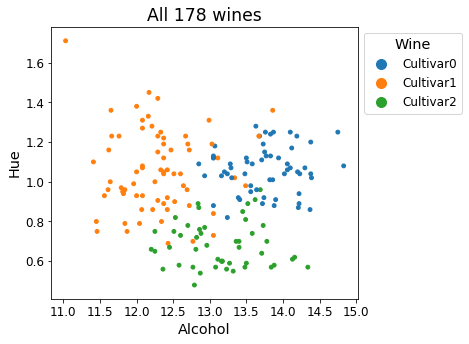

In [133]:
fig, ax = plt.subplots(1, figsize=(5.5,5))
scprep.plot.scatter(data_2d.iloc[:,0], data_2d.iloc[:,1], 
                    c=class_names,
                    xlabel='Alcohol', ylabel='Hue', title='All 178 wines',
                    legend_anchor=(1,1), legend_title='Wine',
                    ax=ax)

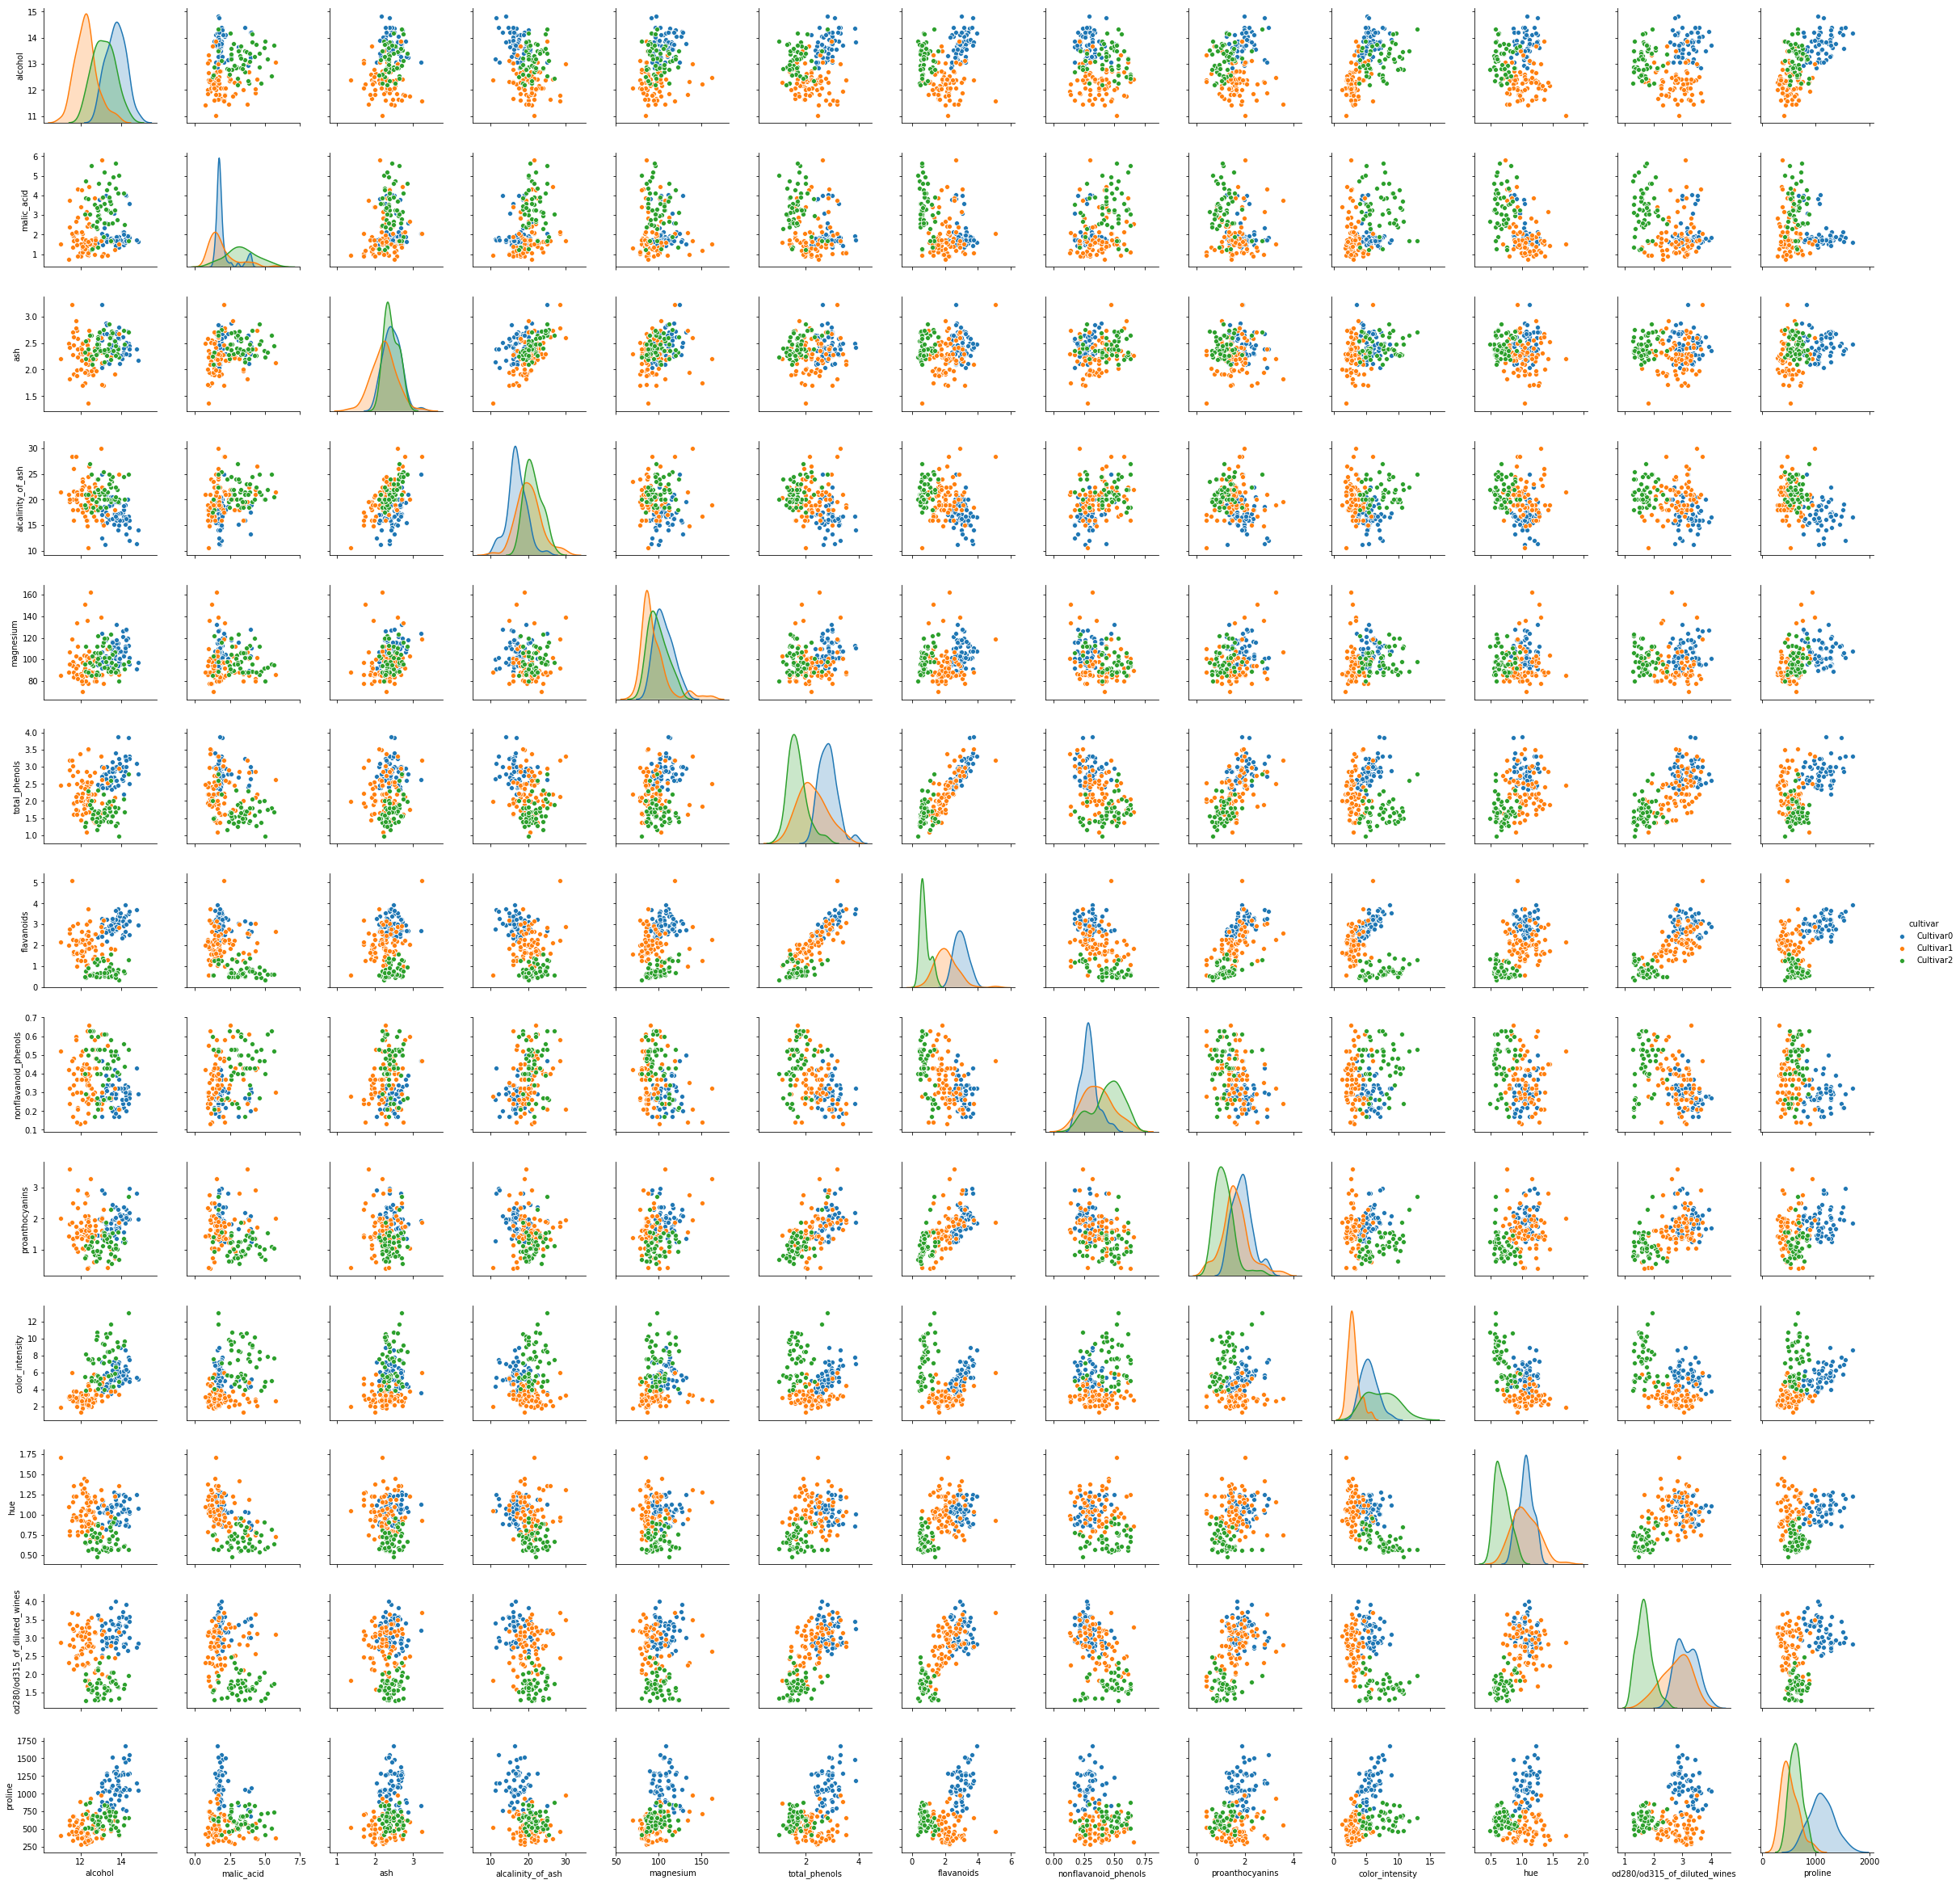

In [131]:
data['cultivar'] = class_names
sns.pairplot(data, hue='cultivar')

In [134]:
cultivars = class_names

In [137]:
cultivars = np.array(cultivars)

In [159]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cultivar
Wine0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Cultivar0
Wine1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Cultivar0
Wine2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Cultivar0
Wine3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Cultivar0
Wine4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Cultivar0


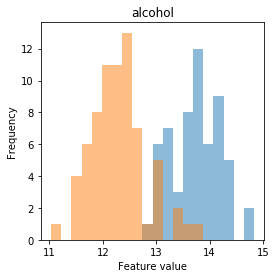

In [161]:
# Pick a feature in the data
feature = data['alcohol'] # OR feature = data.iloc[:,0]

# Type in your desired cultivars here
a_group = 'Cultivar0'
b_group = 'Cultivar1'

# Creates the figure and axis for plotting
fig, ax = plt.subplots(1, figsize=(4,4))

# Find the upper and lower bounds of the feature
feature_lim = (np.min(feature), np.max(feature))

for cultivar in [a_group, b_group]:
    mask = cultivars == cultivar
    feature_subset = feature[mask]
    
    ax.hist(feature_subset, range=feature_lim, bins=20, alpha=0.5)
    ax.set_title(feature.name)
    ax.set_xlabel('Feature value'); ax.set_ylabel('Frequency')

Text(0, 0.5, 'flavanoids')

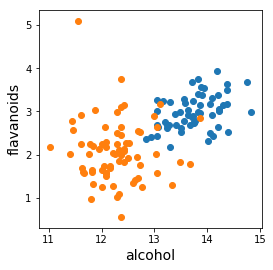

In [166]:
# Pick a feature in the data
a_feature = data['alcohol'] # OR feature = data.iloc[:,0]
b_feature = data['flavanoids'] # OR feature = data.iloc[:,0]

# Type in your desired cultivars here
a_group = 'Cultivar0'
b_group = 'Cultivar1'

# Creates the figure and axis for plotting
fig, ax = plt.subplots(1, figsize=(4,4))

# Find the upper and lower bounds of the feature
feature_lim = (np.min(feature), np.max(feature))

for cultivar in [a_group, b_group]:
    mask = cultivars == cultivar
    x = a_feature[mask]
    y = b_feature[mask]
    ax.scatter(x, y)
    
ax.set_xlabel(a_feature.name, fontsize=14)
ax.set_ylabel(b_feature.name, fontsize=14)

In [30]:
from sklearn.preprocessing import StandardScaler

In [34]:
data_scaled = StandardScaler().fit_transform(data)

In [35]:
sns.clustermap(data_scaled, xticklabels=data.columns, row_colors=plt.cm.tab10(class_labels))

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [40]:
import matplotlib.pyplot as plt

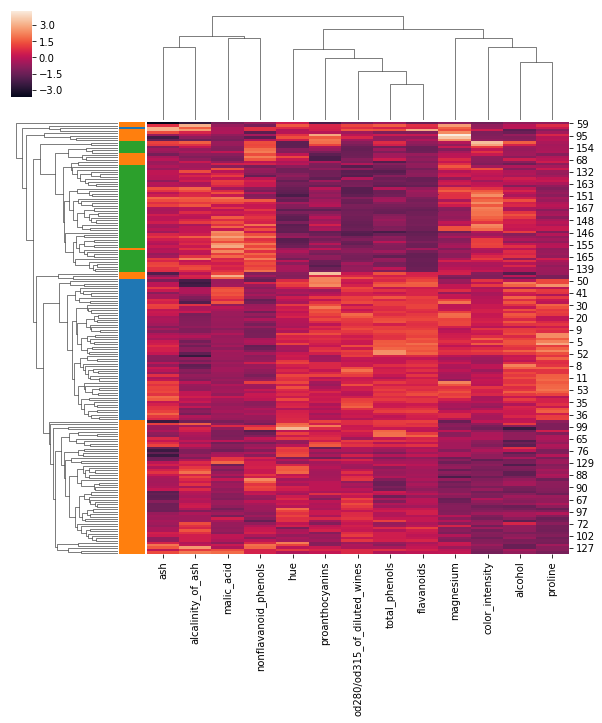

In [43]:
sns.clustermap(data_scaled, xticklabels=data.columns, row_colors=plt.cm.tab10(class_labels))